In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')

data_path='/Users/anastasiaclark/irs_nyc_migration/data'
nyc=['36005','36047','36061','36081','36085']

years=['2010','2011','2012','2013','2014','2015', '2016']

metro_pep=pd.read_csv(os.path.join(data_path, 'census_pop_est','cbsa-est2016-modified.csv'),converters={'CBSA':str})
county_pep=pd.read_csv(os.path.join(data_path, 'census_pop_est','co-est2016-alldata.csv'), converters={'STATE':str,'COUNTY':str},encoding='LATIN-1')

In [18]:
metro_pep.head()
metro_pep.set_index('CBSA')

,NAME,LSAD,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,...,NETMIG2014,NETMIG2015,NETMIG2016,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016
CBSA,,,,,,,,,,,,,,,,,,,,,
10100,"Aberdeen, SD",Micropolitan Statistical Area,40602,40602,40723,41038,41624,42290,42450,42708,...,48,148,253,1,-12,11,-16,-3,-20,-23
10140,"Aberdeen, WA",Micropolitan Statistical Area,72797,72804,72863,72349,71746,70989,70779,71023,...,-106,256,661,-1,-8,6,-52,-48,42,12
10180,"Abilene, TX",Metropolitan Statistical Area,165252,165252,165603,166651,167540,167609,168465,169893,...,120,733,-218,0,24,2,54,-51,-13,-1
10220,"Ada, OK",Micropolitan Statistical Area,37492,37492,37602,37714,38039,38165,38263,38268,...,-42,-50,76,-3,-12,1,15,-25,23,-19
10300,"Adrian, MI",Micropolitan Statistical Area,99892,99892,99635,99302,98994,98784,98696,98389,...,-141,-385,139,21,-45,11,-4,-33,44,-76
10420,"Akron, OH",Metropolitan Statistical Area,703200,703203,703124,703115,702477,703433,704355,703358,...,546,-1368,-1106,-4,-329,-1,88,-471,-59,-479
10460,"Alamogordo, NM",Micropolitan Statistical Area,63797,63799,64356,65494,66016,65813,64994,64430,...,-1100,-851,722,17,-19,-6,-43,-4,-38,-32
10500,"Albany, GA",Metropolitan Statistical Area,157308,157500,157663,157814,157322,155953,155154,153508,...,-1431,-2173,-1787,0,79,24,-36,-12,-2,76
10540,"Albany, OR",Metropolitan Statistical Area,116672,116672,116888,118127,118332,118496,119188,120444,...,441,987,2138,-2,2,-9,26,13,107,121


In [19]:
# county pep needs unique FIPS
county_pep.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
0,40,3,6,01,000,Alabama,Alabama,4779736,4780131,4785492,...,0.335703,0.086842,-0.642255,-0.177829,0.709411,1.062617,1.202226,1.065267,0.411670,0.797351
1,50,3,6,01,001,Alabama,Autauga County,54571,54571,54742,...,-4.607582,2.149969,-2.799695,4.128528,6.163804,-5.295515,-4.571158,2.259290,-2.654256,4.255281
2,50,3,6,01,003,Alabama,Baldwin County,182265,182265,183199,...,21.672935,19.038117,17.311339,19.628723,15.757654,18.612620,22.757100,20.248574,18.585398,20.807611
3,50,3,6,01,005,Alabama,Barbour County,27457,27457,27348,...,-7.027927,-4.208488,-16.593442,-9.495549,-1.280316,-7.418561,-7.360829,-4.506434,-16.819716,-9.686991
4,50,3,6,01,007,Alabama,Bibb County,22915,22919,22861,...,-6.556506,0.088865,0.088747,1.504292,-4.956466,-4.318988,-5.980596,0.888652,0.887469,2.300681


In [20]:
county_pep['fips']=county_pep.STATE+county_pep.COUNTY
county_pep.set_index('fips',inplace=True)

In [21]:
# most columns are the same in county and metro pep dataset
# however, one column, NPOPCNHG has an underscore in county pep
# remove the udnderscore to make columns of interest be same in both datasets
col_names=[c.replace('_','') for c in county_pep.columns]
county_pep.columns=col_names

In [22]:
# get a subset of NYC counties
nyc_est=county_pep.loc[nyc]

# get a subset of records for New York Metro Area
ny_metro=metro_pep[metro_pep.NAME.str.contains('New York')].copy()

# create lists of columns that will be used in analysis
pop_change=[c for c in nyc_est.columns if c.startswith('NPOPCHG')]
nat_inc=[c for c in nyc_est.columns if c.startswith('NATURALINC')]
net_int=[c for c in nyc_est.columns if c.startswith('INTERNATIONALMIG')]
net_dom=[c for c in nyc_est.columns if c.startswith('DOMESTICMIG')]

In [23]:
keep_cols=pop_change+nat_inc+net_int+net_dom
nyc_est=nyc_est[keep_cols].copy()
nyc_est

,NPOPCHG2010,NPOPCHG2011,NPOPCHG2012,NPOPCHG2013,NPOPCHG2014,NPOPCHG2015,NPOPCHG2016,NATURALINC2010,NATURALINC2011,NATURALINC2012,...,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016
fips,,,,,,,,,,,,,,,,,,,,,
36005,3133,11750,14784,11776,11137,11509,6524,3263,13205,12789,...,16643,17308,17198,-3455,-17720,-13389,-14171,-18051,-16181,-20956
36047,5534,33427,28615,23062,17200,12397,4209,6597,26094,26419,...,22383,23318,22955,-5704,-15495,-17858,-21175,-32526,-33042,-43264
36061,2656,21003,15588,5332,4015,6700,2566,2738,9625,9965,...,16715,17422,17217,-2932,-3130,-9030,-16750,-22309,-16103,-21557
36081,4765,24446,18268,19574,16551,13079,5826,4262,16907,16297,...,25699,26697,26295,-4790,-16926,-21324,-17387,-26537,-25746,-35335
36085,976,1446,-174,1537,627,827,2046,592,2369,2213,...,1314,1394,1356,133,-2033,-3684,-1139,-2324,-1824,-299


In [24]:
ny_metro=ny_metro[keep_cols]
ny_metro

,NPOPCHG2010,NPOPCHG2011,NPOPCHG2012,NPOPCHG2013,NPOPCHG2014,NPOPCHG2015,NPOPCHG2016,NATURALINC2010,NATURALINC2011,NATURALINC2012,...,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016
608,34328,150377,113258,104411,83389,65829,35571,30938,114909,113773,...,139938,145777,143731,-25641,-97755,-128006,-115765,-168503,-166950,-199996


In [25]:
# sum counties records to represent a single NYC record
city=nyc_est.sum(axis=0)

In [26]:
# function to reshape the data: make a row for each year of data
def reshape_dataset(df):
    # list to hold temporary dfs while reshaping
    dfs=[]
    for year in years:
        ixs=[i for i in df.index if year in i]
        yr=df.loc[ixs].reset_index().T
        yr.columns=yr.iloc[0]
        yr.drop(yr.index[0], inplace=True)
        yr.index=[year]
        # strip the year out of the column
        new_names=[n[0:len(n)-4].strip('_') for n in yr.columns]
        # assign new column names for a single year row
        yr.columns=new_names
        # append single year of data to the list 
        dfs.append(yr)
    # concatenate all the years
    reshaped=pd.concat(dfs)
    return reshaped

# function to plot the dataset as stacked bar chart
def plot_pop_change(df, title):    
    ax=df[['NATURALINC','INTERNATIONALMIG','DOMESTICMIG']].plot(kind='bar',stacked=True)
    df['NPOPCHG'].plot(ax=ax, linestyle=':', color='black', linewidth=3, legend=True)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.set_title(title)
    plt.show()

In [27]:
# reshape the data for NYC
df1=reshape_dataset(city) 
df1

,NPOPCHG,NATURALINC,INTERNATIONALMIG,DOMESTICMIG
2010,17064,17452,16855,-16748
2011,92072,68200,78044,-55304
2012,77081,67683,76138,-65285
2013,61281,65881,74595,-70622
2014,49530,64602,82754,-101747
2015,44512,60631,86139,-92896
2016,21171,57494,85021,-121411


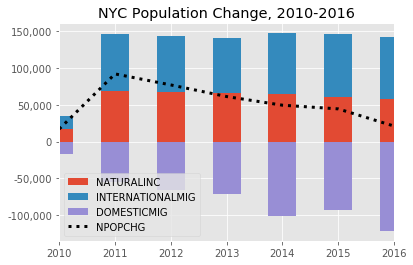

In [28]:
plot_pop_change(df1, 'NYC Population Change, 2010-2016')  

In [29]:
# reshape the data for New York metro
df2=reshape_dataset(ny_metro.T) 
df2

,NPOPCHG,NATURALINC,INTERNATIONALMIG,DOMESTICMIG
2010,34328,30938,29876,-25641
2011,150377,114909,133814,-97755
2012,113258,113773,129274,-128006
2013,104411,106624,126294,-115765
2014,83389,108950,139938,-168503
2015,65829,101803,145777,-166950
2016,35571,94720,143731,-199996


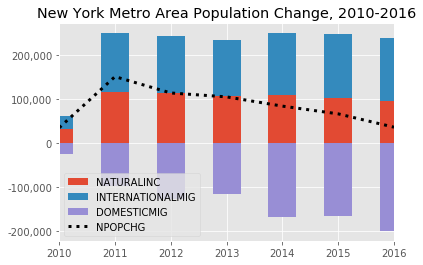

In [30]:
plot_pop_change(df2, 'New York Metro Area Population Change, 2010-2016') 

In [31]:
# top 5 metro areas with largest pop growth
for year in years:
    print metro_pep[['NAME','NPOPCHG{}'.format(year)]].sort_values('NPOPCHG{}'.format(year),ascending=False).head(n=5)

                                             NAME  NPOPCHG2010
608         New York-Newark-Jersey City, NY-NJ-PA        34328
892  Washington-Arlington-Alexandria, DC-VA-MD-WV        30239
388          Houston-The Woodlands-Sugar Land, TX        27675
212               Dallas-Fort Worth-Arlington, TX        26436
716          Riverside-San Bernardino-Ontario, CA        18823
                                             NAME  NPOPCHG2011
608         New York-Newark-Jersey City, NY-NJ-PA       150377
212               Dallas-Fort Worth-Arlington, TX       118899
550     Miami-Fort Lauderdale-West Palm Beach, FL       113041
892  Washington-Arlington-Alexandria, DC-VA-MD-WV       110456
388          Houston-The Woodlands-Sugar Land, TX       109238
                                             NAME  NPOPCHG2012
212               Dallas-Fort Worth-Arlington, TX       132504
388          Houston-The Woodlands-Sugar Land, TX       123405
608         New York-Newark-Jersey City, NY-NJ-PA      

In [32]:
# TODO use cities with largest pop growth to compare IRS inflow/outflow pattern to NYC/NY METRO